In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [4]:


train_image_generator =  ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen =  train_image_generator.flow_from_directory(
        'cats_and_dogs/train',batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(
        'cats_and_dogs/validation',batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
        'cats_and_dogs',batch_size=batch_size, classes=['test'],target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary',shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [12]:
train_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

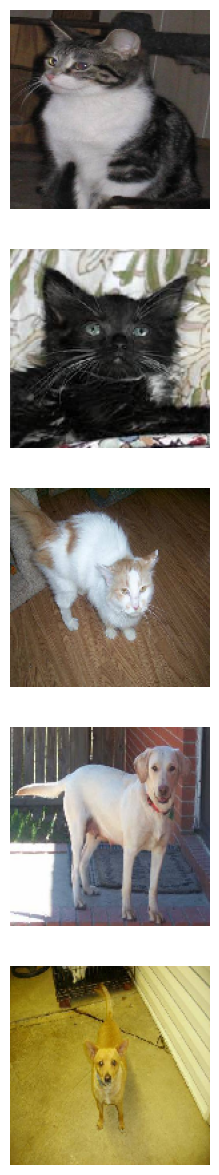

In [18]:
# 4
def plotImages(images_arr,probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")

    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [13]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                              horizontal_flip=True,
                                              vertical_flip=True,
                                              rotation_range = 60,
                                            width_shift_range = 0.1,
                                           height_shift_range = 0.1,
                                           )


Found 2000 images belonging to 2 classes.


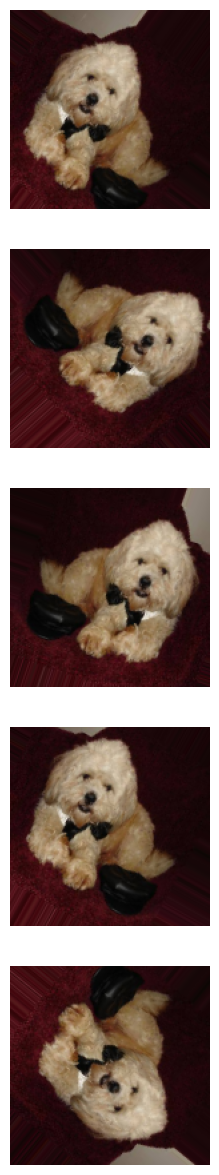

In [19]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [27]:
# 7

model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2)
])



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [29]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch = 10,  # same for both models
    epochs=30,
    validation_data=val_data_gen,
    validation_steps=50) # same for both models



model.summary()

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5041

10/10 [==============================] - 45s 4s/step - loss: 0.6945 - accuracy: 0.5041 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 33s 3s/step - loss: 0.6931 - accuracy: 0.5008
Epoch 3/30
10/10 [==============================] - 34s 3s/step - loss: 0.6923 - accuracy: 0.5122
Epoch 4/30
10/10 [==============================] - 34s 3s/step - loss: 0.6915 - accuracy: 0.5594
Epoch 5/30
10/10 [==============================] - 36s 3s/step - loss: 0.6869 - accuracy: 0.5479
Epoch 6/30
10/10 [==============================] - 44s 4s/step - loss: 0.6854 - accuracy: 0.5703
Epoch 7/30
10/10 [==============================] - 37s 4s/step - loss: 0.6857 - accuracy: 0.5695
Epoch 8/30
10/10 [==============================] - 35s 3s/step - loss: 0.6749 - accuracy: 0.5958
Epoch 9/30
10/10 [==============================] - 38s 4s/step - loss: 0.6541 - accuracy: 0.6250
Epoch 10/30
10/10 [==============================] - 34s 3s/step - loss: 0.6658 - accur

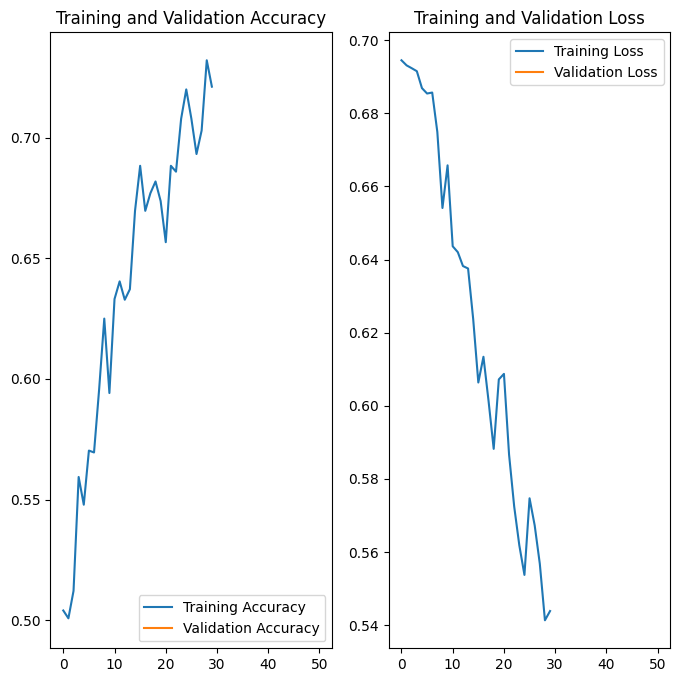

In [40]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(50, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(50, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
probability_model = Sequential([model, tf.keras.layers.Softmax()])
probabilities = probability_model.predict(test_data_gen)

1/1 [==============================] - 1s 512ms/step


In [86]:
probabilities=[np.argmax(probabilities[i]) for i in range(len(probabilities))]
probabilities

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

In [89]:
#10
sample_training_images, _ = next(test_data_gen)
plotImages(sample_training_images, probabilities=probabilities)

Output hidden; open in https://colab.research.google.com to view.

In [90]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
